# The theory of monoids

In this notebook, we will construct a presentation of the *theory of monoids* or *associative algebras* in `rewalt`.
Depending on your favourite gadget, you may see this as the data defining a monoidal category (PRO) or an operad.

Let's first import `rewalt` and create an empty diagrammatic set — an object of class `DiagSet` — that we will call `Mon`.

In [1]:
import rewalt
rewalt.strdiags.DEFAULT['show'] = False  # this is to avoid a jupyter warning when showing pictures

Mon = rewalt.DiagSet()

You know how a monoidal category can be seen as a one-object bicategory (its [delooping](https://ncatlab.org/nlab/show/delooping#deloopings_of_higher_categorical_structures))? This is how we do it in `rewalt` too: the sorts of a monoidal theory are *1-cells* going to and from a single 0-cell. 

So first of all, we add a single 0-dimensional generator to our diagrammatic set.

In [2]:
pt = Mon.add('pt')

This adds a 0-dimensional generator to `Mon`, assigns it the name `'pt'` and returns the diagram consisting of that generator only; we assign this diagram to the variable `pt`.

Next, we add a single 1-dimensional generator, corresponding to the single sort of our theory.

In [3]:
a = Mon.add('a', pt, pt)

The two extra arguments that we gave to `add` specify the *input*, or *source boundary* of the new generator, and the *output*, or *target boundary* of the new generator, respectively. In this case they are both equal to the unique "point".

By the way, if you fail to assign the output of `add` to a variable, you can always get it by giving the generator's name to `Mon`'s indexer:

In [4]:
assert a == Mon['a']

There is not much that we can do with 0-cells... but with 1-cells, we can create larger diagrams by *pasting*.

The `paste` method pastes together diagrams along the k-dimensional output boundary of one and the k-dimensional input boundary of the other, when these match each other.

For a 1-cell, the only non-trivial boundary is the 0-dimensional one; pasting along it corresponds to "concatenation of paths". We can concatenate `a` to itself as many times as we want. Let's also visualise the result as a "1-dimensional string diagram".

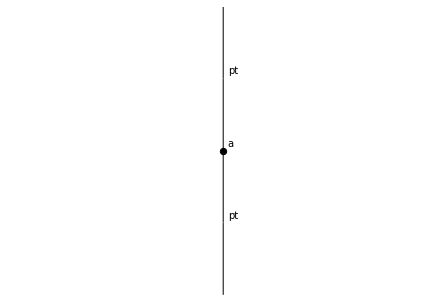

In [5]:
a.draw()

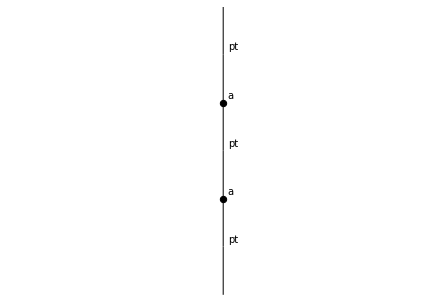

In [6]:
a.paste(a).draw()

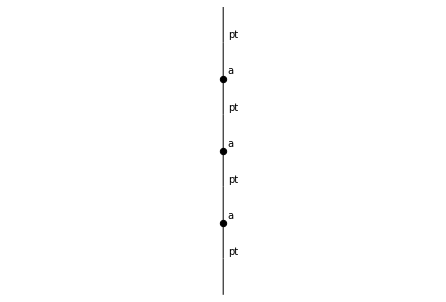

In [7]:
a.paste(a).paste(a).draw()

And so on. Note that `paste` can also take an integer argument specifying the dimension of the boundary along which to paste; it defaults to the *minimum of the two diagrams' dimensions, minus 1*. In this case the minimum of 1 and 1 is 1, which minus 1 equals 0, and that's the boundary we want.

Now that we have the sorts, let's add the operations. The *monoid multiplication* takes two inputs and returns one output. This corresponds to a 2-dimensional generator, whose input is `a.paste(a)`, and output `a`.

In [8]:
m = Mon.add('m', a.paste(a), a)

And let's picture this as a string diagram.

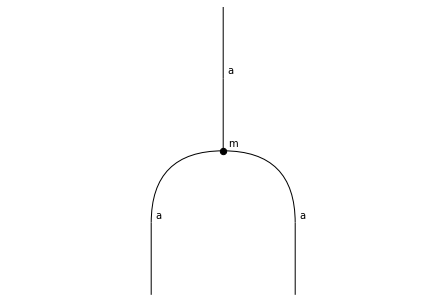

In [9]:
m.draw()

(As you can see, string diagrams by default go from bottom to top. If you prefer left-to-right, or top-to-bottom, or right-to-left orientation, you can pass it as an argument to `draw`; or to change the default setting, reassign `rewalt.strdiags.DEFAULT['orientation']`.)

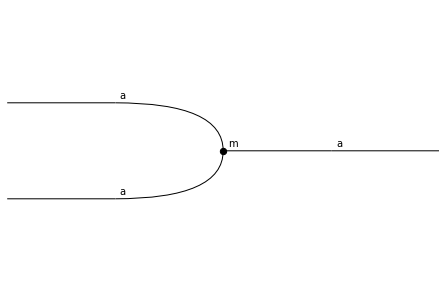

In [10]:
m.draw(orientation='lr')

Since we have a single sort, it is a little pointless to label the wires. Same for labelling the unique point. Let's switch labels off for these generators.

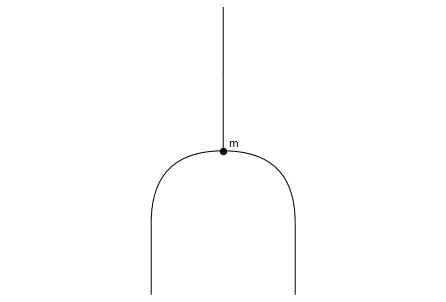

In [11]:
Mon.update('a', draw_label=False)
Mon.update('pt', draw_label=False)
m.draw()

Next, we want to add the monoid unit, which is a "nullary" operation. Here things get a little more subtle. 

Cells in `rewalt` are not allowed to have "strictly lower-dimensional" inputs or outputs: if we try to add a 2-dimensional generator whose input is a 0-dimensional diagram, we will get an error.

In [12]:
try:
    u = Mon.add('u', pt, a)
except ValueError:
    print('Nope')

Nope


Instead, we have to use "weak units", in the form of *degenerate diagrams*.
(This may seem like a hassle in dimension 2, where "everything can be strictified", but pays off in higher dimensions.)

A simple constructor for degenerate diagrams is the `unit` method, which creates a "unit diagram", one dimension higher.

In [13]:
assert pt.dim == 0
assert not pt.isdegenerate

assert pt.unit().dim == 1
assert pt.unit().isdegenerate

So to add the monoid unit, we make `pt.unit()` its input. 

In string diagrams, degenerate cells are represented as translucent wires (when wires), or as "node-less nodes" (when nodes).

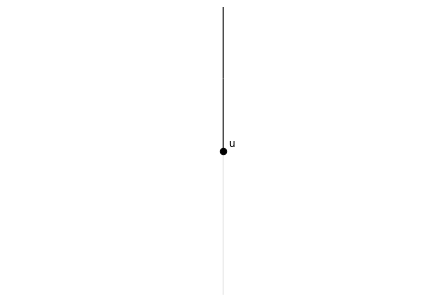

In [14]:
u = Mon.add('u', pt.unit(), a)
u.draw()

Now we can compose diagrams with `paste` in two directions, along the 0-boundary ("horizontally") or the 1-boundary ("vertically")...

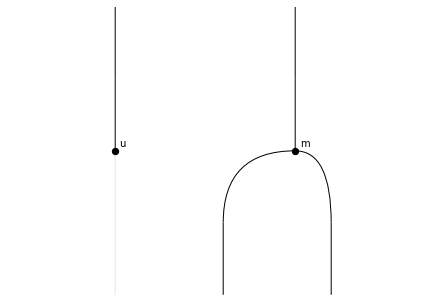

In [15]:
u.paste(m, 0).draw()  # "horizontal" pasting

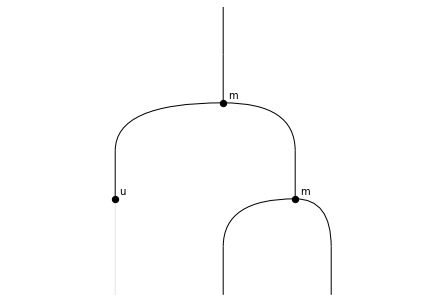

In [16]:
u.paste(m, 0).paste(m).draw()  # ...and now "vertical" pasting

A useful alternative to `paste` (especially in an "operadic" setting) are the methods `to_inputs` and `to_outputs`, which allow us to paste a diagram only to *some* inputs and outputs of another diagram.

To use these in practice, one must know that every node and wire in a string diagram have a unique *position*. We can use the keyword arguments `positions` (both nodes and wires), `nodepositions`, and `wirepositions` to enable positions in string diagram output.

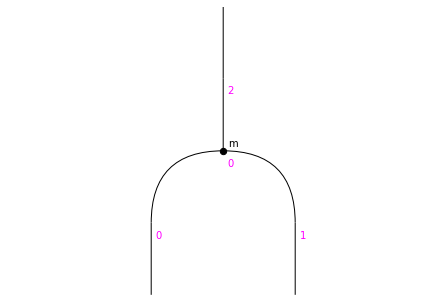

In [17]:
m.draw(positions=True)

Now, we can paste another multiplication either to the input in position 0, or the input in position 1.

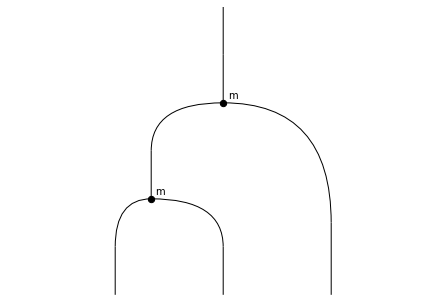

In [18]:
m.to_inputs(0, m).draw()

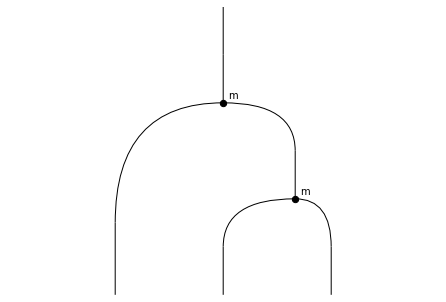

In [19]:
m.to_inputs(1, m).draw()

These two diagrams happen to be the two sides of the *associativity* equation, so let's add this equation to our presentation!

Or rather, we add an *oriented* associativity equation, or associativity *rewrite*, or "associator", as a *3-dimensional generator*. All the cells in diagrammatic sets have a direction.

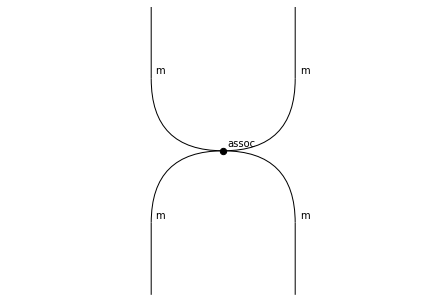

In [20]:
assoc = Mon.add('assoc', m.to_inputs(0, m), m.to_inputs(1, m))
assoc.draw()

You can see that, when we draw a 3-dimensional diagram, we obtain a "2-dimensional slice" string diagram, where nodes correspond to 3-cells and wires to 2-cells. (In general, for an n-dimensional diagram, nodes are n-dimensional cells and wires are (n-1)-dimensional cells).

To see the two "sides" of the rewrite, we can either use the `draw_boundaries` method, or first call `input`/`output` and only then `draw`.

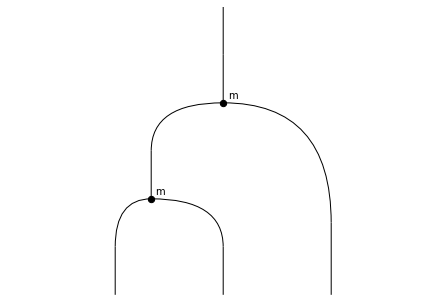

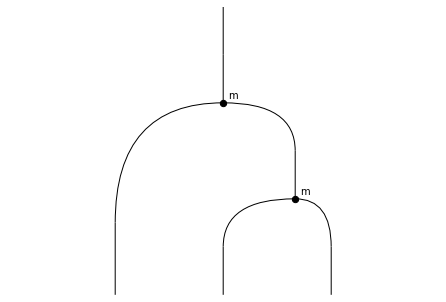

In [21]:
assoc.draw_boundaries()

Next, let's add left unitality and right unitality equations/rewrites. The left-hand side of the left unitality equation is this.

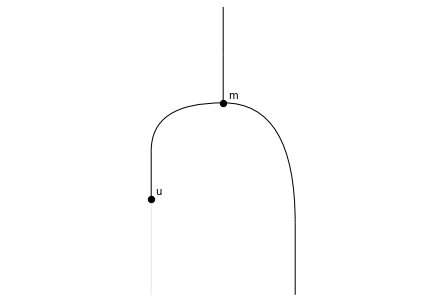

In [22]:
m.to_inputs(0, u).draw()

This is equal to "the identity" on our sort... but not really, because there is a weak unit in the input; instead we need another degenerate cell called the *left unitor* on `a`. We build it like this.

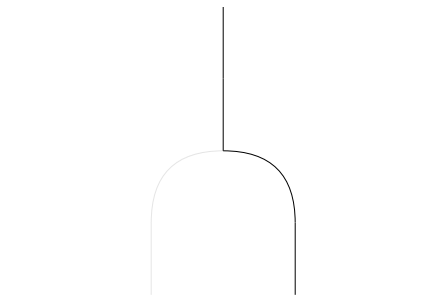

In [23]:
a.lunitor('-').draw()

The argument `'-'` specifies that the unit should appear in the input, and not the output.

Now we can add the "left unitality" generator.

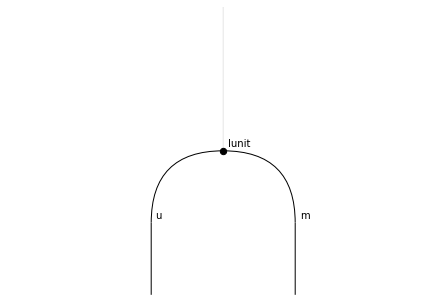

In [24]:
lunit = Mon.add('lunit', m.to_inputs(0, u), a.lunitor('-'))
lunit.draw()

We proceed similarly for the "right unitality" generator.

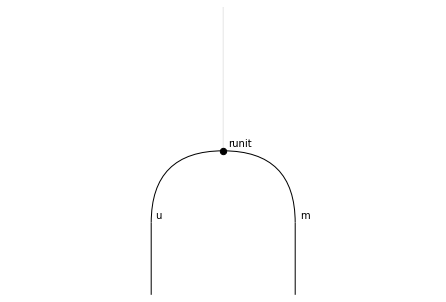

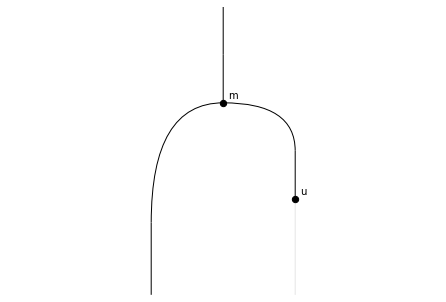

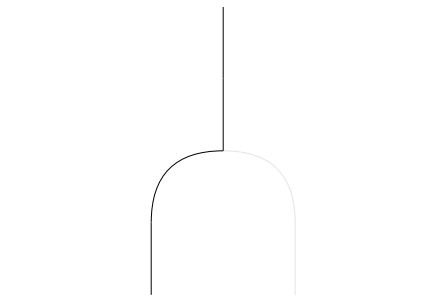

In [25]:
runit = Mon.add('runit', m.to_inputs(1, u), a.runitor('-'))
runit.draw()
runit.draw_boundaries()

That's it, we now have a presentation of the theory of monoids!

Except our "equations" are really directed *rewrites*. What if we want to use them in both directions?
Luckily, we have methods for "weakly inverting" a generator. Let's try it on `assoc`.

In [26]:
Mon.invert('assoc')

(<rewalt.diagrams.Diagram at 0x7f4b73a8b0a0>,
 <rewalt.diagrams.Diagram at 0x7f4b73a8a5c0>)

This returned 3 diagrams, which corresponds to the fact that 3 new generators were added. Let's see what happened. We can see a list of the generators, ordered by dimension, with the `DiagSet` method `by_dim`.

In [27]:
Mon.by_dim

{0: {'pt'},
 1: {'a'},
 2: {'m', 'u'},
 3: {'assoc', 'assoc⁻¹', 'lunit', 'runit'},
 4: {'inv(assoc, assoc⁻¹)', 'inv(assoc⁻¹, assoc)'}}

So, first of all, there's a new 3-dimensional generator, `assoc⁻¹`.

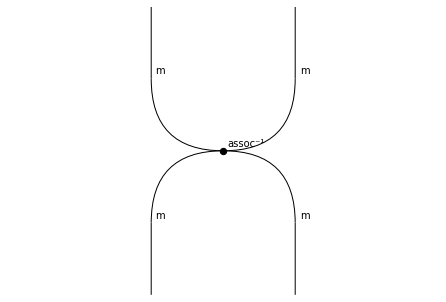

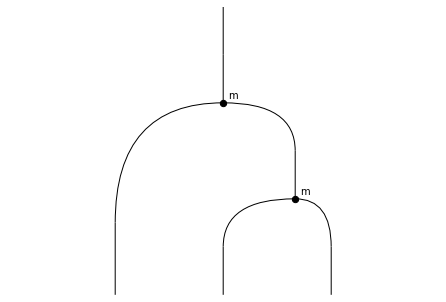

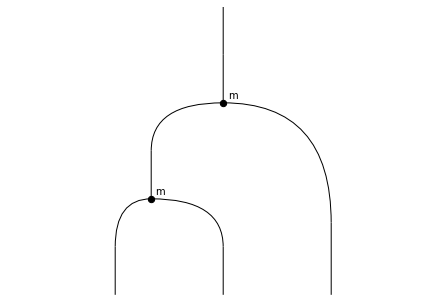

In [28]:
Mon['assoc⁻¹'].draw()
Mon['assoc⁻¹'].draw_boundaries()

This is the "weak inverse" of `assoc`: a generator with the same boundaries as `assoc`, but going in the reverse direction.

Then, we have two new *4-dimensional* generators, `inv(assoc, assoc⁻¹)` and `inv(assoc⁻¹, assoc)`.

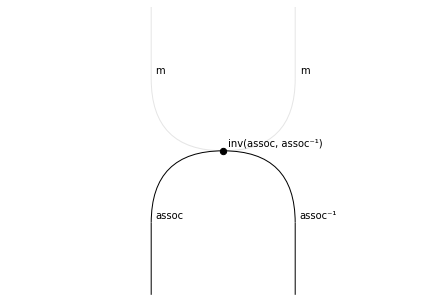

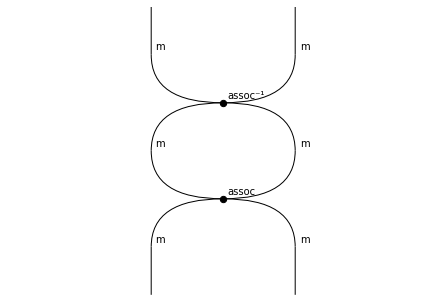

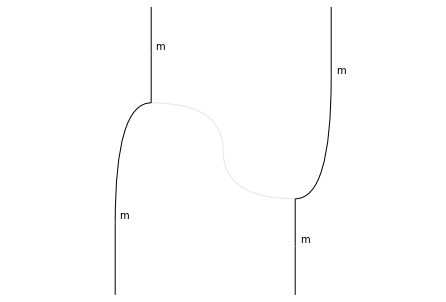

In [29]:
Mon['inv(assoc, assoc⁻¹)'].draw()
Mon['inv(assoc, assoc⁻¹)'].draw_boundaries()

This generator "exhibits" the fact that `assoc⁻¹` is a right inverse (right in diagrammatic order; left in composition order) for `assoc`: it goes from the pasting of `assoc` and `assoc⁻¹`, to a weak unit on the input of `assoc`.

Similarly, `inv(assoc, assoc⁻¹)` exhibits the fact that `assoc⁻¹` is a left inverse.

In the [theory of diagrammatic sets](https://arxiv.org/abs/2007.14505), these two "witnesses" should, themselves, be weakly invertible cells; since this would require an infinite number of generators, we leave it to the user to invert them when/if needed.

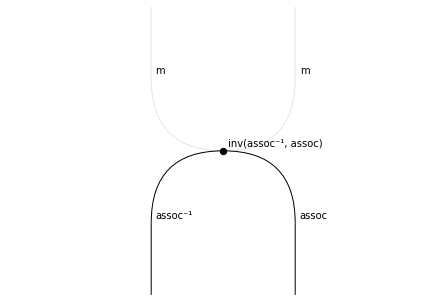

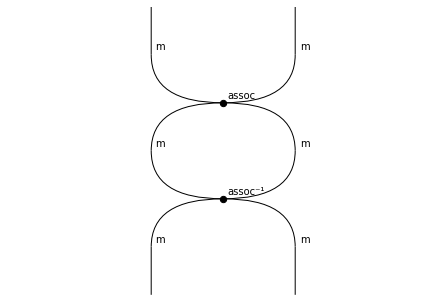

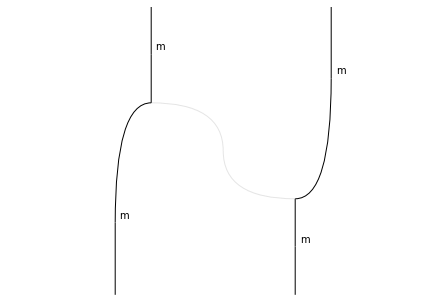

In [30]:
Mon['inv(assoc⁻¹, assoc)'].draw()
Mon['inv(assoc⁻¹, assoc)'].draw_boundaries()

Let's start using our presentation to make some diagrammatic computations. Let's create a (2-dimensional) diagram with our operations.

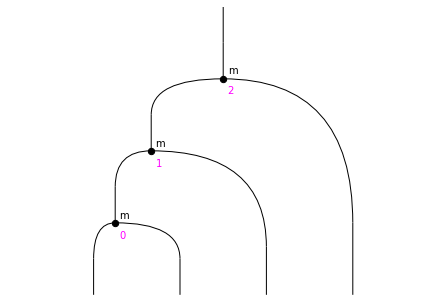

In [31]:
start = m.to_inputs(0, m).to_inputs(0, m)
start.draw(nodepositions=True)

In traditional algebraic notation, this would correspond to the term $m(m(m(x, y), z), w)$.

We see that we can apply an associativity rewrite/equation in two places: corresponding to the nodes in positions (0, 1), and to the nodes in positions (1, 2).

We can "apply rewrites" with the `rewrite` method. 
The result of `rewrite` is *not* going to be the "rewritten" 2-dimensional diagram. Instead, it will be a *3-dimensional* diagram whose input is the original diagram, and output is the rewritten diagram: an "embodiment" of the rewrite operation.

(The `rewrite` method is, in fact, a special instance of `to_outputs`; once you understand the principles of higher-dimensional rewriting, you should be able to see why).

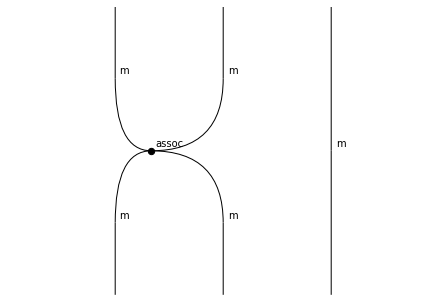

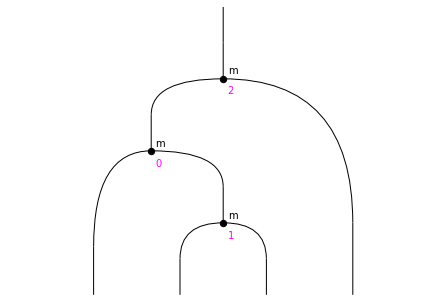

In [32]:
rew1 = start.rewrite([0,1], assoc)
rew1.draw()
rew1.output.draw(nodepositions=True)

In the rewritten diagram, we can only apply `assoc` to the nodes (0, 2).

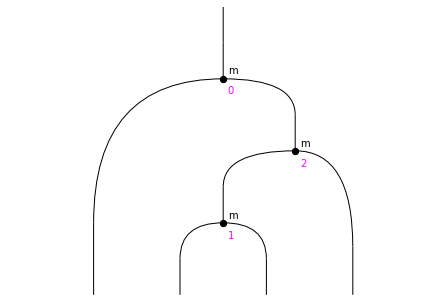

In [33]:
rew2 = rew1.output.rewrite([0, 2], assoc)
rew2.output.draw(nodepositions=True)

Now, we can apply `assoc` to the nodes (1, 2).

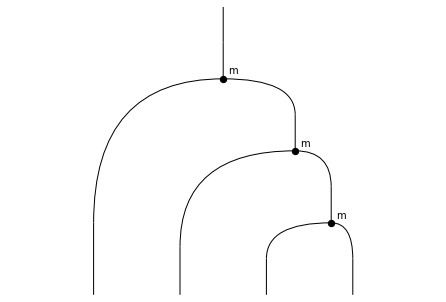

In [34]:
rew3 = rew2.output.rewrite([1, 2], assoc)
rew3.output.draw()

We cannot apply `assoc` anywhere else. (Of course we could start applying `assoc⁻¹`). 

Let's put together our sequence of rewrites.

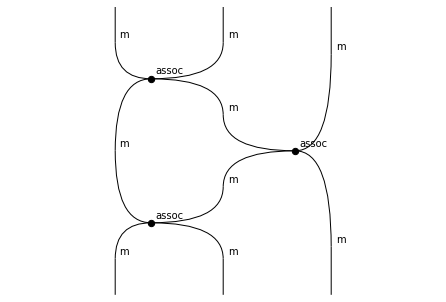

In [35]:
seq1 = rewalt.Diagram.with_layers(rew1, rew2, rew3)
seq1.draw()

(We could have equally defined `seq1` as `rew1.paste(rew2).paste(rew3)`).

We can use the method `rewrite_steps` to get all our rewrite steps... and we can even produce a little gif animation with all the steps. (We'll make it loop backwards as well so it doesn't end too soon.)

In [36]:
rewalt.strdiags.to_gif(*seq1.rewrite_steps, loop=True, path='monoids_1.gif')

![SegmentLocal](monoids_1.gif "Sequence of associator rewrites")

Let's go back to the `start` and pick a different rewrite, the one on nodes (1, 2).

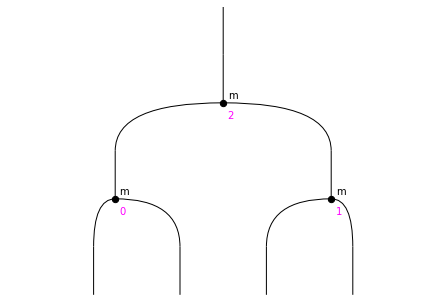

In [37]:
rew4 = start.rewrite([1, 2], assoc)
rew4.output.draw(nodepositions=True)

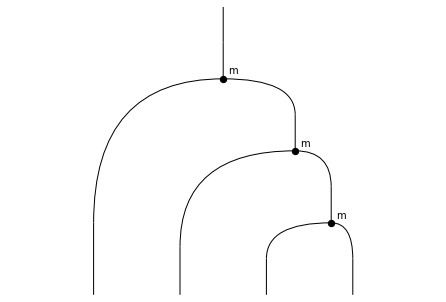

In [38]:
rew5 = rew4.output.rewrite([0, 2], assoc)
rew5.output.draw()

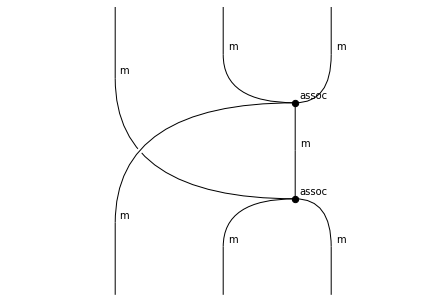

In [39]:
seq2 = rew4.paste(rew5)
seq2.draw()
rewalt.strdiags.to_gif(*seq2.rewrite_steps, loop=True, path='monoids_2.gif')

![SegmentLocal](monoids_2.gif "Another sequence of associator rewrites")

You can see that `seq1` and `seq2` are two different sequences of rewrites with the same starting and ending point. 

If you are familiar with the characterisation of monoidal categories as *pseudomonoids* in the monoidal 2-category of categories with cartesian product, you may recognise the two sides of Mac Lane's *pentagon equation*! 

Indeed, we can add a 4-dimensional generator between the two, embodying Mac Lane's pentagon.

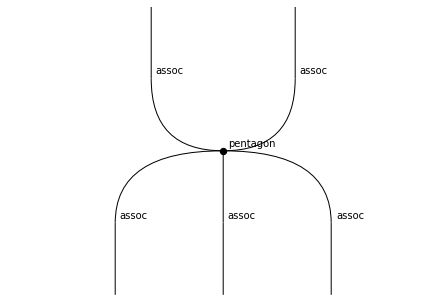

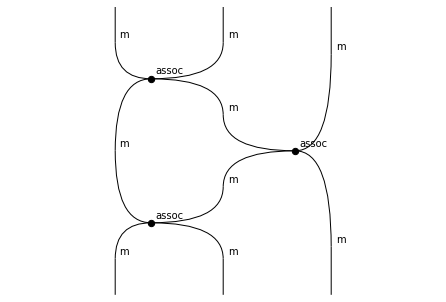

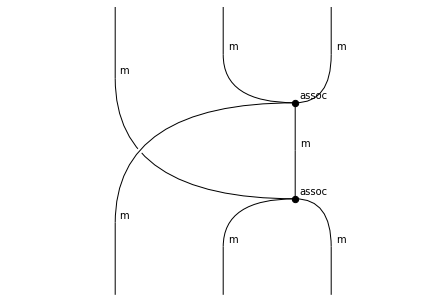

In [40]:
pentagon = Mon.add('pentagon', seq1, seq2)
pentagon.draw()
pentagon.draw_boundaries()

We could go on and add generators corresponding to Mac Lane's *triangle*... but this was supposed to be about the theory of *monoids*, not of *lax* or *pseudo*monoids, so let's stop here instead.